# Scatterplots

Scatterplots are used to show correlation, most often between two continuous variables. They CAN be used with a mixture of categorical and continuous varibles, but it can get dicey quickly. It's better if you have two variables that aren't grouped together. 

To show how scatterplots work, we're going to use some data from the [Hollywood Age Gap](https://hollywoodagegap.com/) project, which shows the age gap between the actors in movies. The project has a [github repository](https://github.com/lynnandtonic/hollywood-age-gap) and I've added the data to the course data repository. 

So let's first get ggplot set up and import the data.

In [2]:
library(ggplot2)
library(ggrepel)

In [3]:
movies <- read.csv("../../Data/movies.csv")

In [4]:
head(movies)

Movie.Name,Release.Year,Director,Age.Difference,Actor.1.Name,Actor.1.Gender,Actor.1.Birthdate,Actor.1.Age,Actor.2.Name,Actor.2.Gender,Actor.2.Birthdate,Actor.2.Age
Harold and Maude,1971,Hal Ashby,52,Bud Cort,man,1948-03-29,23,Ruth Gordon,woman,1896-10-30,75
Beginners,2010,Mike Mills,43,Christopher Plummer,man,1929-12-13,81,Goran Visnjic,man,1972-09-09,38
Poison Ivy,1992,Katt Shea,42,Tom Skerritt,man,1933-08-25,59,Drew Barrymore,woman,1975-02-22,17
Whatever Works,2009,Woody Allen,40,Larry David,man,1947-07-02,62,Evan Rachel Wood,woman,1987-09-07,22
Entrapment,1999,Jon Amiel,39,Sean Connery,man,1930-08-25,69,Catherine Zeta-Jones,woman,1969-09-25,30
Husbands and Wives,1992,Woody Allen,38,Woody Allen,man,1935-12-01,57,Juliette Lewis,woman,1973-06-21,19


If you are sensing a pattern with ggplot, that's good because there is one. We invoke ggplot, we pass it a data frame, set up our aesthetic and then give it a geomemtry. It's the same way every time. So let's use `Actor.1.Age` and `Actor.2.Age` as our continuous variables and plot them. 

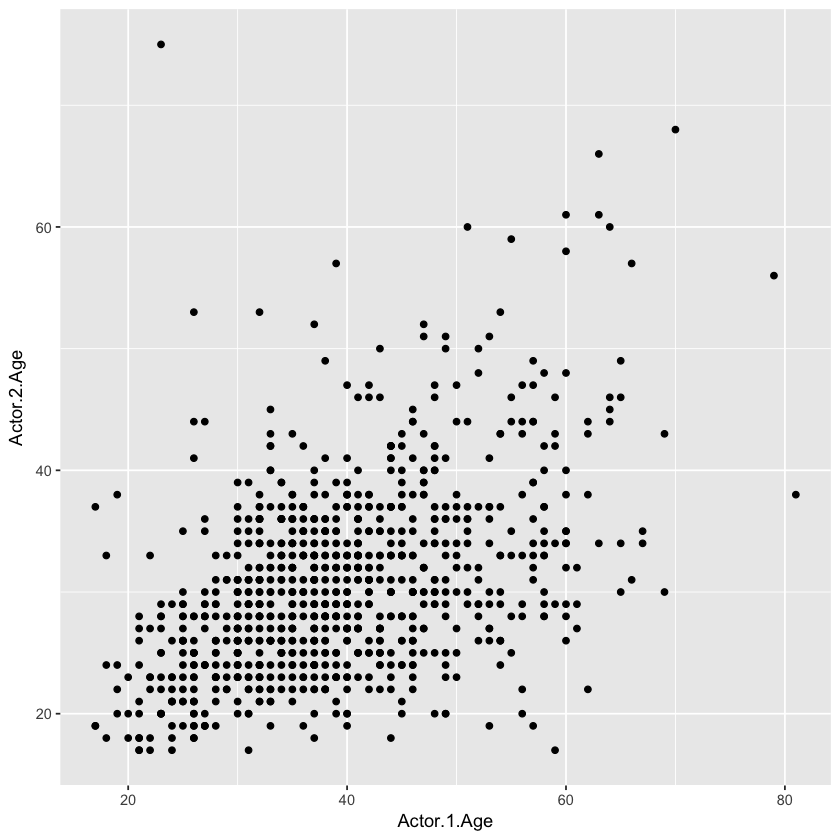

In [5]:
ggplot(movies, aes(x=Actor.1.Age, y=Actor.2.Age)) + geom_point()

The immediate problem you can see is ... which movie is that all the way up in the top left corner? Or down along the bottom? What are these movies out here with actors in their 80s? 

We have a problem of labeling.

To solve this, we're going to introduce a new geometry: `geom_text` which just renders up text where the data would appear in the chart. We tell it which bit of text to render and, as you might imagine, [there's a lot of options](http://ggplot2.tidyverse.org/reference/geom_text.html). 

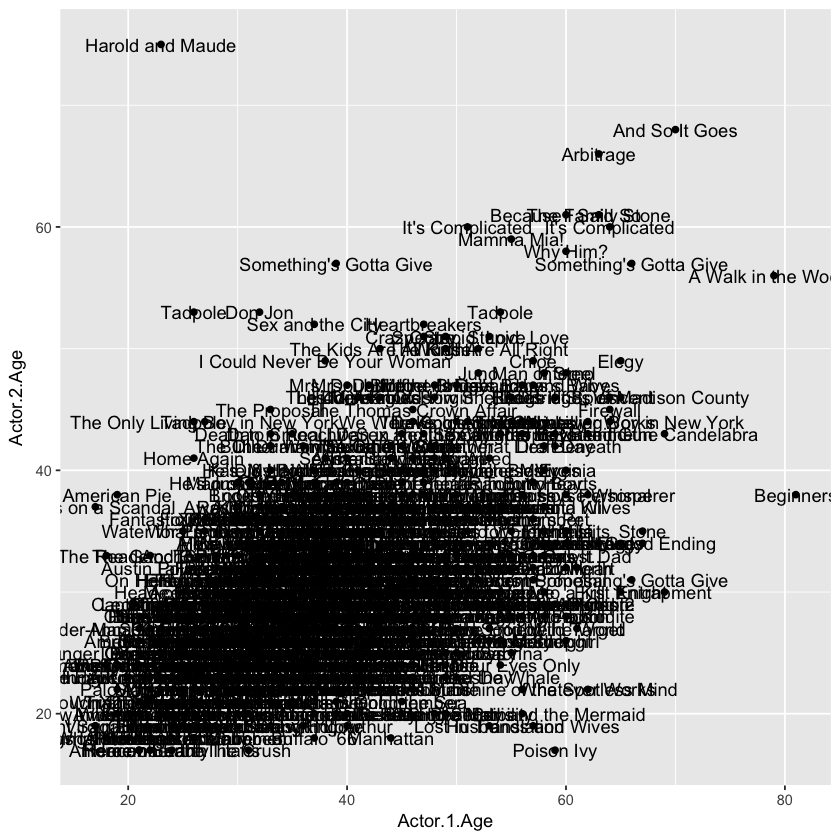

In [6]:
ggplot(movies, aes(x=Actor.1.Age, y=Actor.2.Age)) + 
geom_point() + 
geom_text(data=movies, aes(label=Movie.Name))

Eeek. That's no good. 

To fix this, we have several options, but they all boil down to createing a subset of the data that labels only the points we want to label. If you look at the head again, you can see there's a field called Age.Difference. What if we just looked at movies with greater than a 35 year age difference? 

There's two ways we can accomplish this: We can create a new dataframe and populate it with a filtered set of data where the only records remaining have the required age differences in them. Then, where it says `data=` in the geom_text, we can make that our new dataframe. 

Or, we can use a trick called `subset`. It looks like `subset(movies, Age.Difference>35`. We can put that directly into the `data=` bits and it will give us what we want. 

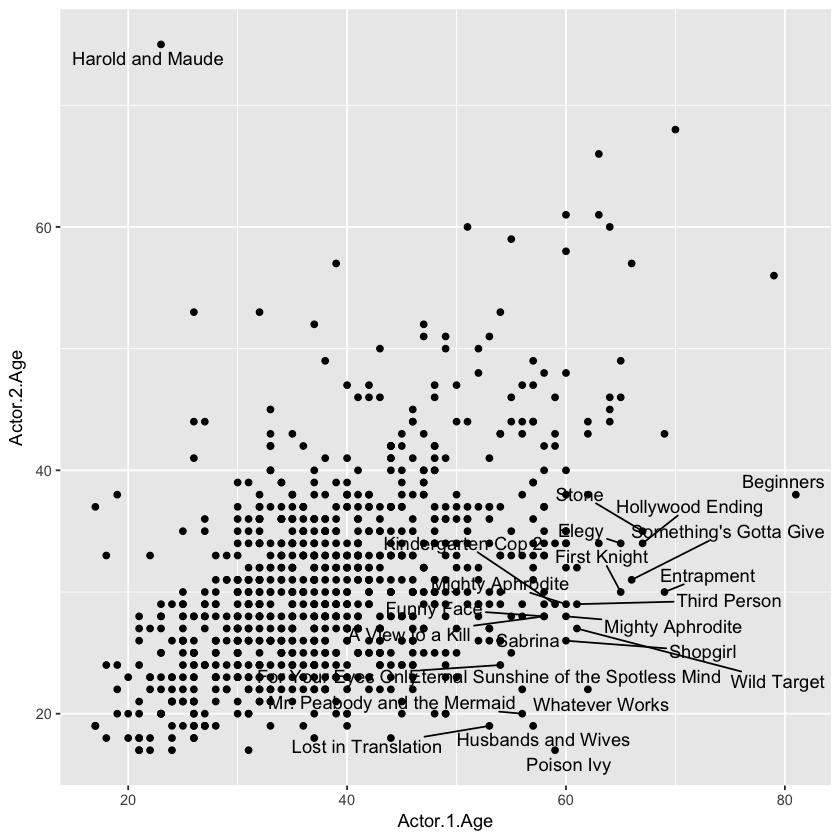

In [7]:
ggplot(movies, aes(x=Actor.1.Age, y=Actor.2.Age)) + 
geom_point() + 
geom_text_repel(data=subset(movies, Age.Difference>=30), aes(label=Movie.Name))

Getting there. We can now look into the options -- we can shrink the text, nudge it above, below or left or right of the dot and we can make sure that our labels don't overlap. Here's what that looks like: 

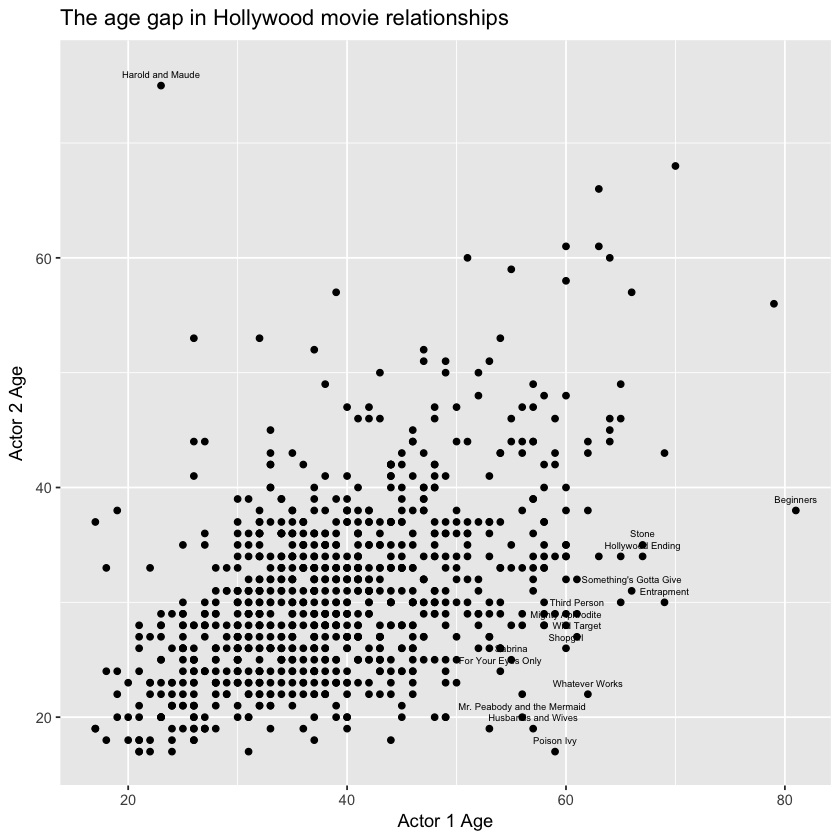

In [10]:
ggplot(movies, aes(x=Actor.1.Age, y=Actor.2.Age)) + 
geom_point() + 
geom_text(data=subset(movies, Age.Difference>=30), aes(label=Movie.Name), size=2, nudge_y=1, check_overlap = TRUE) +
labs(x="Actor 1 Age", y="Actor 2 Age", title="The age gap in Hollywood movie relationships")

Another thing we can add to correlation plots? A fit line -- the line that represents the relationship. That gives us some idea of the relationship between our X and our Y values. There's [a ton of options here](http://ggplot2.tidyverse.org/reference/geom_smooth.html), but the simplest is the linear model. It's a straight line. To get it, we add `geom_smooth` after our point geom.  

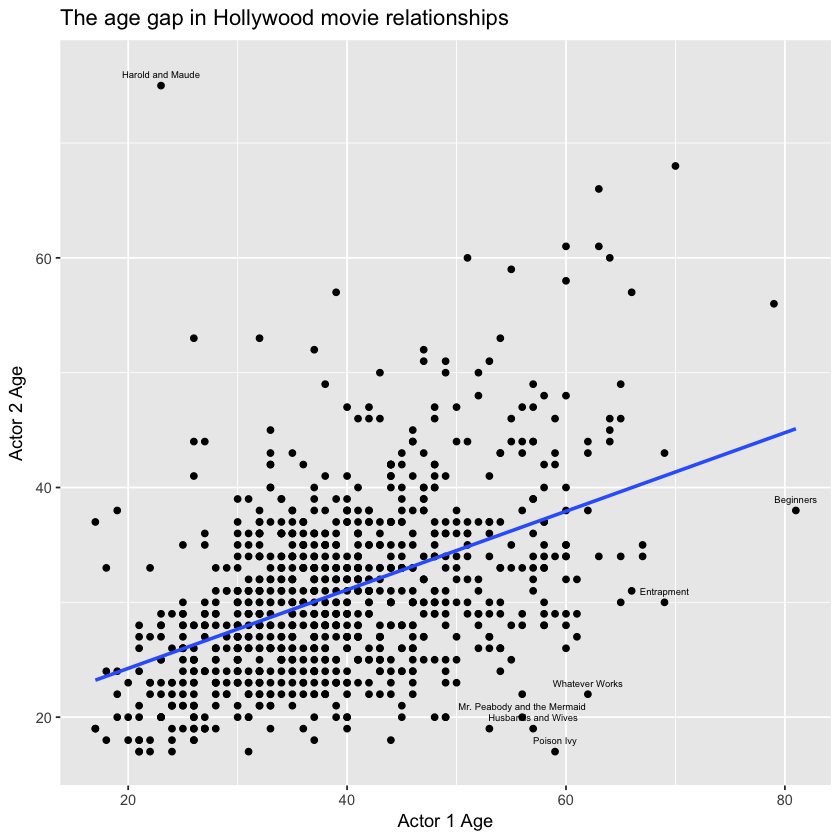

In [8]:
ggplot(movies, aes(x=Actor.1.Age, y=Actor.2.Age)) + 
geom_point() + 
geom_smooth(method=lm, se=FALSE) + 
geom_text(data=subset(movies, Age.Difference>35), aes(label=Movie.Name), size=2, nudge_y=1, check_overlap = TRUE) +
labs(x="Actor 1 Age", y="Actor 2 Age", title="The age gap in Hollywood movie relationships")

What that says is there's a general linear relationship between the age of the male actor and the age of the female actor, but it's not 1 to 1. It's closer to 2 to 1. 

## In class assignment

You are now working for the chancellor's office. You must help make budget cutting decisions. You have [a dataset that includes the number of faculty in a department and the number of credit hours that department created](https://www.dropbox.com/s/xm5ku5qjj6rhaki/fac2chp.csv?dl=0). How might you visualize this data to help guide those discussions?

Work in pairs, work fast, we're going to show them in class.

In [11]:
credit <- read.csv("../../Data/fac2chp.csv")

In [12]:
head(credit)

Department,TotalFaculty,CreditHours
Advertising,24,3198
Agricultural Economics,23,149
"Agricultural Leadership, Education and Co",19,3370
Agronomy and Horticulture,50,4949
Animal Science,29,3331
Anthropology,9,6016


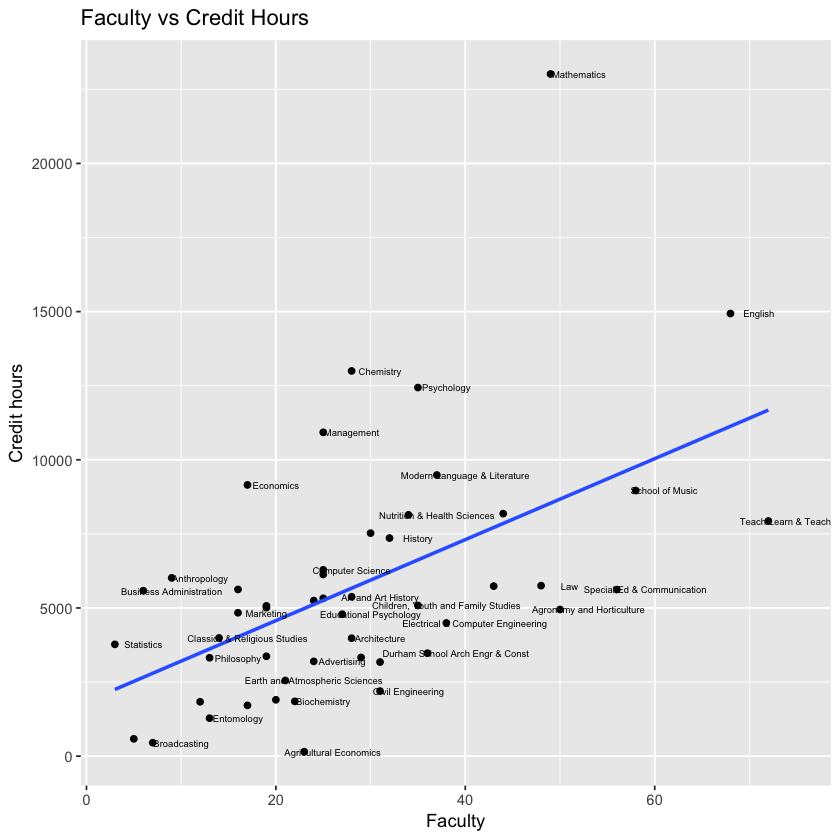

In [23]:
ggplot(credit, aes(x=TotalFaculty, y=CreditHours)) + 
geom_point() + 
geom_smooth(method=lm, se=FALSE) + 
geom_text(data=credit, aes(label=Department), size=2, nudge_x=3, check_overlap = TRUE) +
labs(x="Faculty", y="Credit hours", title="Faculty vs Credit Hours")